# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.198977e+01     9.201289e+00
 * time: 0.0013260841369628906
     1     2.951761e+01     4.276715e+00
 * time: 0.0047719478607177734
     2     1.919494e+01     3.769695e+00
 * time: 0.00875091552734375
     3     1.351640e+01     2.812366e+00
 * time: 0.012624979019165039
     4     1.286588e+01     3.662410e+00
 * time: 0.01587986946105957
     5     1.079022e+01     1.888039e+00
 * time: 0.06435799598693848
     6     9.846451e+00     2.173849e+00
 * time: 0.06764101982116699
     7     9.126272e+00     1.468243e+00
 * time: 0.07077789306640625
     8     8.648970e+00     8.051723e-01
 * time: 0.07399296760559082
     9     8.410926e+00     7.009855e-01
 * time: 0.07732200622558594
    10     8.269629e+00     6.561092e-01
 * time: 0.07975387573242188
    11     8.208666e+00     6.225715e-01
 * time: 0.08222198486328125
    12     8.194357e+00     1.021142e+00
 * time: 0.08486199378967285
    13     8.104729e+00     5.252079e-01
 * 

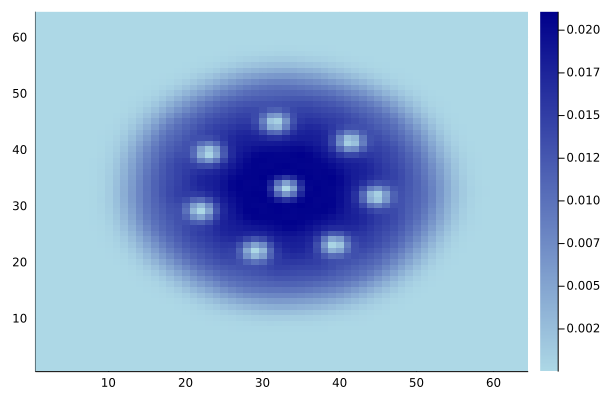

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)